<a href="https://colab.research.google.com/github/nlasri/Data-Science_Classification-Vin/blob/main/Copie_de_exercice2_gestion_classe_genres_exo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exercice 2 : Data analysis***

# **2. Gestion de la classe Genres**

## **2.1 Analyse du problème**

***Importations de librairies***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

***Importation des données***

In [ ]:
url = 'https://raw.githubusercontent.com/EstelleDhm/SDATA_projet_dataset/main/Spotify_exo2.csv'
data = pd.read_csv(url)

***Analyse de la colonne 'genres'***

In [ ]:
#on détermine les différentes "valeurs" possibles pour cet attribut

genres = data['genres'].unique()
print('genres : ', genres)
print('Taille de genres : ', genres.shape[0])

genres :  ['21st century classical' '432hz' '8-bit' ... 'zouk' 'zurich indie'
 'zydeco']
Taille de genres :  2973


Il y a autant de valeurs possibles que de données, il est donc inutile d'utiliser la fonction LabelEncoder(). Il nous faut essayer de réduire le nombre de valeurs possibles pour la classe 'genres'.

##**2.2 Solutions pour traiter la classe Genres**

Nous avons réfléchi à plusieurs solutions pour gérer la classe Genres :

1. La première solution se décompose en plusieurs étapes. Il faut d'abord réduire au maximum les genres différents en travaillant sur les chaînes de caractères :
 - Elle peut être divisée en plusieurs mots différents (ex: classic pakistani pop qui comporte 3 mots). Chaque mot prendra une ligne distincte dans la base de données.
 - Un travail de compréhension sur les genres peut être fait visuellement. On remarque qu'une indication sur la région du monde où la chanson a été créée est souvent donnée (ex : classic pakistani pop). Cette indication peut être séparée du genre et mise dans une nouvelle colonne.
 - Une fois que le travail sur les chaînes de caractères a été fait, un clustering peut permettre de regrouper les différents genres. Le clustering permet une bonne compréhension des nouveaux genres car nous savons exactement comment ils sont composés. 
 - Enfin, lors de l'ajout de nouvelles chansons dans la base de données, les genres associés peuvent être ajoutés en parcourant la liste des genres qui compose chaque grand groupe de genres et en choisissant le groupe avec un genre similaire à l'intérieur.

2. Une deuxième solution est de d'abord réduire la base de données en examinant les chaines de caractères de la classe genre. 
Un travail de compréhension sur les genres peut être également fait. Les noms de la classe 'genres' sont divisés. 
On peut ensuite utiliser du one hot encoding et mettre chaque genre sur une colonne : une chanson comportant ce genre aura sa cellule à 1, sinon elle sera à 0. 
On peut ensuite réduire les colonnes et donc les genres différents grâce à une ACP (Analyse en Composantes Principales) (ou PCA en anglais). 

Nous décidons de mettre en place la 1ère méthode, car il est difficile d'interpréter les nouveaux genres après une ACP pour la deuxième méthode. 
Il sera donc plus facile d'ajouter des nouvelles chansons dans le futur en trouvant le meilleur groupe de genres.

##***2.3 Mise en place de la méthode***

### **2.3.1 Traitement sur les chaînes de caractères**

Nous remarquons que la classe 'genres' comporte un grand nombre de régions du monde. Nous décidons donc de diviser les genres en 2 classes : les régions du monde et les genres de musique.

Nous créons une fonction matching_bloc(string1, string2, threshold) pour repérer les mots similaires.

In [ ]:
import difflib

def matching_bloc(string1, string2, threshold):
  """
        Cette fonction permet de déterminer si 2 chaines de caractères ont un 
        bloc de caractères en commun et donc s'ils sont similaires. Elle retourne 
        True quand les chaines de caractères sont similaires.
 
        :param string1: Chaine de caractères à comparer (type : str)
        :param string2: Chaine de caractères à comparer (type : str)
        :param threshold: Seuil au dessus duquel 2 chaines de caractères sont similaires (type : float)
    
  """
  matches = difflib.SequenceMatcher(None, string1, string2).get_matching_blocks()
  for match in matches:
    if match.size>threshold:
      return True
  return False


Nous installons une base de données de pays qui nous permettra de repérer les pays dans la classe 'genres'

In [ ]:
pip install country_list

     |████████████████████████████████| 1.5MB 10.5MB/s 


In [ ]:
#Nous créons une liste avec les noms des pays, des continents, des nationalités et états des USA 

from country_list import countries_for_language
countries = set([x[1].lower() for x in countries_for_language('en')])
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming", "arab", "asian", "athens", "atlanta"]
state_names = set([state.lower() for state in state_names])
countries.update(state_names)
NATIONALITIES_list = ['Afghan', 'Albanian', 'Algerian', 'American', 'Andorran', 'Angolan', 'Antiguans', 'Argentinean', 'Armenian', 'Australian', 'Austrian', 'Azerbaijani', 'Bahamian', 'Bahraini', 'Bangladeshi', 'Barbadian', 'Barbudans', 'Batswana', 'Belarusian', 'Belgian', 'Belizean', 'Beninese', 'Bhutanese', 'Bolivian', 'Bosnian', 'Brazilian', 'British', 'Bruneian', 'Bulgarian', 'Burkinabe', 'Burmese', 'Burundian', 'Cambodian', 'Cameroonian', 'Canadian', 'Cape Verdean', 'Central African', 'Chadian', 'Chilean', 'Chinese', 'Colombian', 'Comoran',  'Congolese', 'Costa Rican', 'Croatian', 'Cuban', 'Cypriot', 'Czech', 'Danish', 'Djibouti', 'Dominican', 'Dutch', 'Dutchman', 'Dutchwoman', 'East Timorese', 'Ecuadorean', 'Egyptian', 'Emirian', 'Equatorial Guinean', 'Eritrean', 'Estonian', 'Ethiopian', 'Fijian', 'Filipino', 'Finnish', 'French', 'Gabonese', 'Gambian', 'Georgian', 'German', 'Ghanaian', 'Greek', 'Grenadian', 'Guatemalan', 'Guinea-Bissauan', 'Guinean', 'Guyanese', 'Haitian', 'Herzegovinian', 'Honduran', 'Hungarian', 'I-Kiribati', 'Icelander', 'Indian', 'Indonesian', 'Iranian', 'Iraqi', 'Irish', 'Israeli', 'Italian', 'Ivorian', 'Jamaican', 'Japanese', 'Jordanian', 'Kazakhstani', 'Kenyan', 'Kittian and Nevisian', 'Kuwaiti', 'Kyrgyz', 'Laotian', 'Latvian', 'Lebanese', 'Liberian', 'Libyan', 'Liechtensteiner', 'Lithuanian', 'Luxembourger', 'Macedonian', 'Malagasy', 'Malawian', 'Malaysian', 'Maldivan', 'Malian', 'Maltese', 'Marshallese', 'Mauritanian', 'Mauritian', 'Mexican', 'Micronesian', 'Moldovan', 'Monacan', 'Mongolian', 'Moroccan', 'Mosotho', 'Motswana', 'Mozambican', 'Namibian', 'Nauruan', 'Nepalese', 'Netherlander', 'New Zealander', 'Ni-Vanuatu', 'Nicaraguan', 'Nigerian', 'Nigerien', 'North Korean', 'Northern Irish', 'Norwegian', 'Omani', 'Pakistani', 'Palauan', 'Panamanian', 'Papua New Guinean', 'Paraguayan', 'Peruvian', 'Polish', 'Portuguese', 'Qatari', 'Romanian', 'Russian', 'Rwandan', 'Saint Lucian', 'Salvadoran', 'Samoan', 'San Marinese', 'Sao Tomean', 'Saudi', 'Scottish', 'Senegalese', 'Serbian', 'Seychellois', 'Sierra Leonean', 'Singaporean', 'Slovakian', 'Slovenian', 'Solomon Islander', 'Somali', 'South African', 'South Korean', 'Spanish', 'Sri Lankan', 'Sudanese', 'Surinamer', 'Swazi', 'Swedish', 'Swiss', 'Syrian', 'Taiwanese', 'Tajik', 'Tanzanian', 'Thai', 'Togolese', 'Tongan', 'Trinidadian or Tobagonian', 'Tunisian', 'Turkish', 'Tuvaluan', 'Ugandan', 'Ukrainian', 'Uruguayan', 'Uzbekistani', 'Venezuelan', 'Vietnamese', 'Welsh', 'Yemenite', 'Zambian', 'Zimbabwean']
NATIONALITIES_list = set([nationality.lower() for nationality in NATIONALITIES_list])
countries.update(NATIONALITIES_list)

#Nous séparons les régions du monde des genres de musiques
#Nous créons également une nouvelle colonne 'regions' dans la base de données
new_feature = []
for idx, genre in enumerate(data['genres']):
  genre_split = genre.split() #Nous séparons les genres de chaque musique en plusieurs mots
  boolean = False
  for nom in genre_split:
    if nom.lower() in countries:
      boolean = True
      genre = " ".join(genre.replace(nom, "").split()) #Nous effaçons la région du monde de la colonne genres
      data.loc[data.index[idx], 'genres'] = genre
      break
  if not boolean:
    for nom in genre_split:    
      for region in countries:
        if matching_bloc(nom.lower(), region, 4): #Nous cherchons des mots qui ressemblent aux régions du monde
          boolean = True
          genre = " ".join(genre.replace(nom, "").split()) #Nous effaçons la région du monde de la colonne genres
          data.loc[data.index[idx], 'genres'] = genre
          nom = region
          break 
      break
  if boolean:
    new_feature.append(nom.lower()) #création de la liste des régions du monde contenues dans la base de données
  else:
    new_feature.append('None') #Si la ligne ne contient pas de région, la colonne regions contient 'None'

data['regions']= new_feature


In [ ]:
print("Nous ajoutons une colonne 'region' à notre DataFrame qui est composée des éléments suivants :")
print(new_feature)

Nous ajoutons une colonne 'region' à notre DataFrame qui est composée des éléments suivants :
['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'salvadoran', 'None', 'None', 'afghan', 'afghan', 'south african', 'south african', 'south african', 'south african', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'alabama', 'alabama', 'alabama', 'alaska', 'albanian', 'albania', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'american', 'american', 'american', 'american', 'american', 'american', 'american', 'american', 'american', 'american', 'american', 'american', 'american', 'american', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', '

**Interprétation :** Nous remarquons une alternance de 'None' et de régions du monde dans la nouvelle colonne 'regions'. En effet tous les genres ne comportent pas forcément de localisation : dans ce cas, celle-ci est mise à 'None'. Dans le cas inverse, la localisation est indiquée.

Nous séparons ensuite les genres en plusieurs mots. Nous attribuons pour chaque mot une copie de la ligne où il se trouvait. Nous éliminons les doublons (mots ayant un bloc de caractères en commun).

In [ ]:
def ligne_dataframe(data, ligne):
  """
        Cette fonction permet de copier une ligne de la base de données et de la
        mettre dans un np.array
 
        :param data: Ensemble de données (type : Pandas Dataframe)
        :param ligne: ligne que l'on veut copier (type : int)
    
  """
  result= []
  for colonne in data:
    val = data.loc[data.index[ligne], colonne]
    result.append(val)
  return result


In [ ]:
def ajout_ligne(data, ligne):
  """
        Cette fonction d'ajouter à la base de données une ligne
 
        :param data: Ensemble de données (type : Pandas Dataframe)
        :param ligne: ligne que l'on veut ajouter (type : list)
    
  """
  nouvelle_ligne = [ligne_dataframe(data, ligne)]
  dataframe = pd.DataFrame(nouvelle_ligne, columns= ['mode', 'genres', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'key', 'regions'], index=[len(data)])
  return pd.concat([data , dataframe])

In [ ]:
liste_genre = []
q_data=0 #iterateur de new data
somme = 0

print("Avant de diviser les genres en mots et d'éliminer les doublons, le nombre de lignes était de", len(data['genres']))

data_copy = data.copy()

for genre in data_copy['genres']:
  q_split = -1
  for nom in genre.split(): #On divise le genre de la musique en plusieurs mots
    q_split = q_split + 1
    somme = somme + 1
    if nom not in liste_genre:  #si le nom n'est pas déjà dans la liste des genres
      s=False
      for liste in liste_genre:
        if matching_bloc(nom, liste, 4): #On vérifie qu'il n'y a pas de noms similaires
          if q_split > 0: 
            data = ajout_ligne(data, q_data) #Ajout colonne et nom similaire
            numero_ligne = data.shape[0] - 1
            data.loc[data.index[numero_ligne], 'genres'] = liste
          else:
            data.loc[data.index[q_data], 'genres'] = nom #nom similaire 
          s = True
          break
      if s == False:
        liste_genre.append(nom)
        if q_split > 0: 
          ligne_dataframe(data, q_data)
          data = ajout_ligne(data, q_data)
          numero_ligne = data.shape[0] - 1
          data.loc[data.index[numero_ligne], 'genres'] = nom  #Ajout colonne et ancien nom
        else:
          data.loc[data.index[q_data], 'genres'] = nom  #Ancien nom divisé
    else:
      if q_split > 0:
        data = ajout_ligne(data, q_data)
        numero_ligne = data.shape[0] - 1
        data.loc[data.index[numero_ligne], 'genres'] = nom #Ajout colonne et ancien nom
      else:
        data.loc[data.index[q_data], 'genres'] = nom #Ancien nom divisé
  q_data = q_data + 1
  

print("Nous parcourons les lignes de la colonne genres :")
q=0
for iter in data['genres']:
  print(iter)

print("Le DataFrame contient maintenant plus de colonnes :")
print(len(data['genres']))

print("Nous affichons l'allure du DataFrame pour vérifier que les modifications ont été bien faites")
print(data.head())

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
atmospheric
atmospheric
atmospheric
indie
audiophile
aussietronica
austin
austin
austindie
alternative
alternative
ambient
children's
choir
classical
classical
country
dance
electropop
garage
hip
house
indie
indie
indie
indigenous
metal
metalcore
pop
post-hardcore
post-punk
psych
r&b
reggae
rock
singer-songwriter
ska
talent
trap
underground
choir
classical
orchestra
pop
modernism

autoharp
autonomous
avant-garde
avant-garde
avant-garde
axe
azeri
azonto
azontobeats
bachata
bachata
background
background
baglama
bahai
folk
pop
baiao
bajki
bakersfield
balearic
balkan
balkan
ballet
ballroom
baltic
hip
indie
banda
banda
banda
bandinhas
bandolim


banjo
bansuri
pop
barbershop
bard
barnmusik
barockinterpreten
baroque
baroque
baroque
baroque
baroque
baroque
baroque
bass
bass
bass

bassline
bath
baton
baton
battle
bay
bay
bboy
bc
beach
beat
beat
beatboxing
beatlesque
bebop
bedroom
bedroom
indie
pop
rock
classical
conte

**Interprétation :** Nous voyons ci-dessus que la majorité des pays ne sont plus présents dans la colonne genre. Une nouvelle colonne 'regions' a également été ajoutée.
Chaque ligne comporte un genre composé d'un seul mot. Les doublons ont également été éliminés.

In [ ]:
print("En faisant ce traitement, le nombre de genres différents est de ", len(liste_genre), ", il a diminué par rapport au nombre de genres avant traitement (2973)." )

En faisant ce traitement, le nombre de genres différents est de  1158 , il a diminué par rapport au nombre de genres avant traitement (2973).


Nous avons terminé notre travail de traitement sur les chaînes de caractères.

### **2.3.2 Clustering**

Nous procédons maintenant à un clustering sur les données restantes. Nous testons les méthodes Kmeans et Gaussian Mixture.

*   ***Test de la méthode Kmeans*** :

In [ ]:
from sklearn.cluster import KMeans

def apply_kmeans(data, nbClusters, nbInit):
    """
        Cette fonction permet d'appliquer la méthode KMeans de sklearn.cluster
        à un ensemble de données en choisissant le nombre de clusters souhaités
        et le nombre d'initialisations différentes à effectuer pour les centres
        initiaux des clusters.
 
        :param data: Ensemble de données (type : Pandas Dataframe)
        :param nbClusters: Nombre de clusters souhaités (type : int)
        :param nbInit: Nombre d'initialisations à effectuer (type : int)
    
    """
    kmean = KMeans(n_clusters=nbClusters, n_init = nbInit).fit(data)
    kmean.transform(data)
    labels = kmean.labels_
    return labels

Nous cherchons d'abord le nombre de clusters idéal en utilisant la méthode elbow et la méthode du score silhouette en fonction du nombre de clusters k.

In [ ]:
from sklearn.metrics import silhouette_score #, silhouette_samples

def methode_silhouette_score(data, choix):
    
    """
        Cette fonction trace un graphique du score silhouette avec la méthode 
        choisie (K-means et Mélange de Gaussiennes) en fonction du nombre de clusters
 
        :param dataset: Ensemble de données (type : Pandas Dataframe)
        :param choix: Méthode choisie ('kmeans', 'GaussianMixture')

    """
    
    scores = []
    K = range(2, 40)
    for k in K:
        if(choix == 'kmeans'):
            kmean = KMeans(n_clusters = k,init="k-means++",n_init = 20).fit(data)
            kmean.transform(data)
            scores.append(silhouette_score(data, kmean.labels_))
        else:
            labels = apply_gaussianMixture(data, k, 20)
            scores.append(silhouette_score(data, labels))
        
        
    plt.figure(figsize=(16,8))
    plt.plot(K, scores, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    
    if (choix == 'kmeans'):
        plt.title('Silhouette Method for k means')          
    else:
        plt.title('Silhouette Method for Gaussian Mixture')

    plt.show()

In [ ]:
def elbow_method_kmeans(data):
        
    """
        Cette fonction trace un graphique de l’inertie des données avec la 
        méthode K-means en fonction du nombre de clusters
 
        :param dataset: Ensemble de données (type : Pandas Dataframe)

    """
    distortions = []
    K = range(1,40)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()



Nous cherchons le nombre de clusters idéal pour la méthode Kmeans. 
Pour cela nous utilisons la méthode elbow et la méthode du score silhouette en fonction de k.


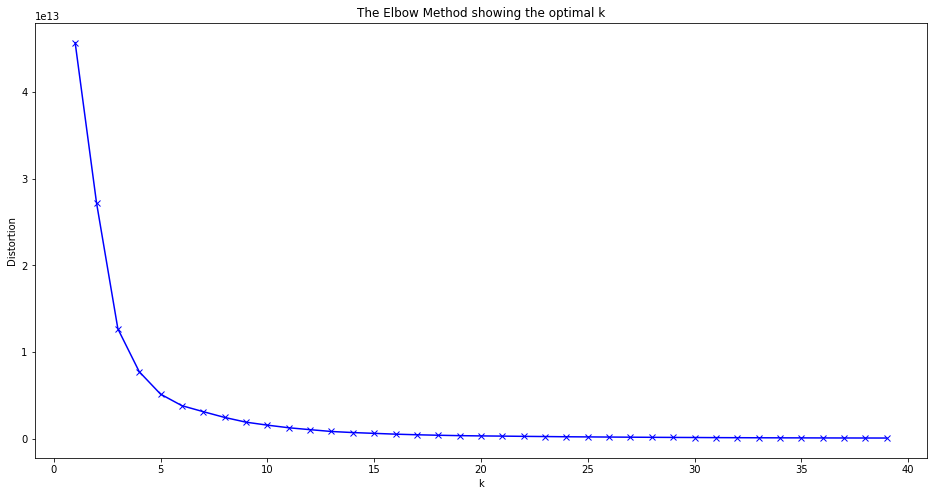

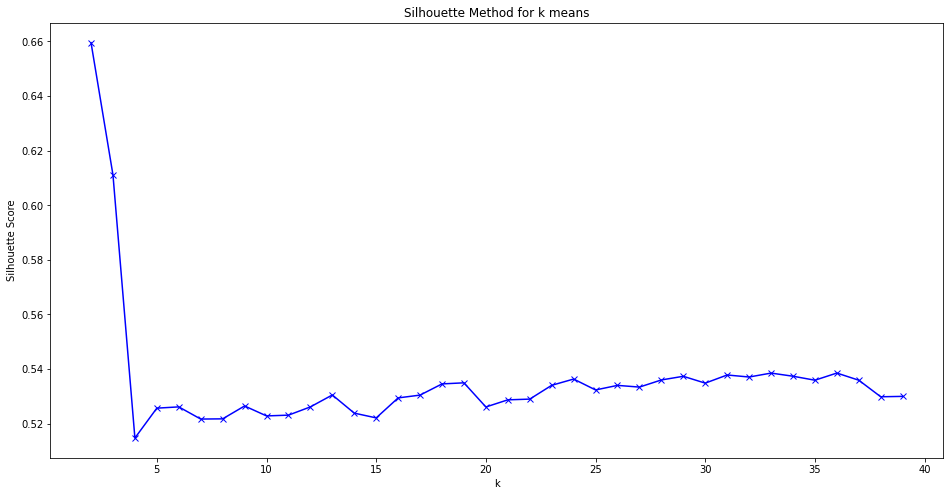

In [ ]:
print("\nNous cherchons le nombre de clusters idéal pour la méthode Kmeans. \nPour cela nous utilisons la méthode elbow et la méthode du score silhouette en fonction de k.")
genre_column = data.pop("genres")
region_column = data.pop("regions")
elbow_method_kmeans(data)
methode_silhouette_score(data, 'kmeans')

Nous remarquons un coude autour de la valeur 10 pour la méthode elbow. Pour la méthode score silhouette, le score est quasiment constant après 3 clusters. Nous choisissons donc 10 clusters pour la méthode Kmeans.

In [ ]:
def afficher_clusters(column, labels):
    """
        Cette fonction permet d'afficher les clusters
     
        :param dataset: Ensemble de données (type : Pandas Dataframe)

    """
    for i in range( 0, max(labels)+1):
        j=0
        classe = []
        for value in labels:
            if (value == i):
                classe.append(column[j])
            j = j + 1
        print("\nlist", i, " : \n", classe)

    

In [ ]:
labels_Kmeans = apply_kmeans(data, 10, 10)
afficher_clusters(genre_column, labels_Kmeans)



list 0  : 
 ['8-bit', 'alberta', 'animal', 'punk', "children's", 'classical', 'post-hardcore', 'autoharp', 'baiao', 'bajki', 'barbershop', 'baroque', 'baroque', 'binaural', 'birdsong', 'brain', 'breakcore', 'brega', "children's", "children's", 'comedy', 'rockabilly', 'capoeira', 'cartoon', "children's", "children's", '', 'classic', 'classic', 'classical', 'classical', 'college', 'comedy', 'hardcore', 'country', 'crust', 'contemporary', 'd-beat', 'alternative', 'dansband', 'dc', 'deep', 'deep', 'deep', 'deep', 'deep', 'detske', 'detskie', 'dong-yo', 'doo-wop', 'folk', 'hip', 'rap', 'erhu', 'folclore', 'baroque', 'contemporary', 'geek', 'literature', 'renaissance', 'gospel', 'guitarra', 'gypsy', 'halloween', 'hong', 'honky', 'horror', 'humppa', 'contemporary', 'indie', 'instrumental', 'iskelma', 'islamic', 'baroque', 'classical', 'contemporary', 'prog', 'rockabilly', 'jazz', 'kabarett', 'mountain', 'kindie', 'kleine', 'kodomo', 'classical', 'lldm', 'lo-fi', 'lo-fi', 'lute', 'medieval', 

Nous remarquons que 10 colonnes ont été crées. Un genre ne comporte que le mot 'experimental', ce genre sera considéré comme le genre 'autre'. Il pourra contenir les genres non classés.

*   ***Test de la méthode Gaussian Mixture*** :

Nous effectuons maintenant la méthode GaussianMixture pour la comparer à la méthode Kmeans.

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

def apply_gaussianMixture(data, nb_components, nb_init=1):
    
    """
        Cette fonction permet d'appliquer la méthode Mélange de Gaussiennes 
        de sklearn.mixture à un ensemble de données en 
        choisissant le nombre de clusters et le nombre d'initialisations
 
        :param data: Ensemble de données (type : Pandas Dataframe)
        :param nb_components: Nombre de clusters 
        :param nb_init: Nombre d'initialisations (par défaut à 1)
    
    """
    
    gmm = GMM(n_components = nb_components, n_init = nb_init).fit(data)
    return gmm.predict(data)

In [ ]:
labels_GM = apply_gaussianMixture(data, 10, 10)
print("Voici les clusters obtenus avec la méthode Gaussian Mixture :\n")
afficher_clusters(genre_column, labels_GM)

Voici les clusters obtenus avec la méthode Gaussian Mixture :


list 0  : 
 ['hip', 'house', "children's", 'classic', 'concert', 'contemporary', 'dark', 'dark', 'deep', 'deep', 'deep', 'drama', 'dubsteppe', 'early', 'experimental', 'house', 'guidance', 'techno', 'latin', 'middle', 'motivation', 'organic', 'pop', 'progressive', 'mexicano', 'tzadik', 'hop', 'story', 'icelandic', 'pop', 'band', 'classical', 'piano', 'animal', 'techno', 'techno', 'full', 'on', 'animal', 'techno', 'psych', 'avant-garde', 'avant-garde', 'indie', 'tech', 'house', 'east', 'hip', 'hop', 'aussietronica', 'trance']

list 1  : 
 ['action', 'afro', 'afro', 'afrofuturismo', 'afroswing', 'pop', 'alberta', 'metalcore', 'hip', 'ska', '', 'azeri', 'azonto', 'pop', 'bay', 'bc', 'pop', 'rock', 'pop', 'singer-songwriter', 'birmingham', 'boom', 'boom', 'ska', 'breton', 'buffalo', 'calgary', 'modern', 'rockabilly', 'celtic', 'charango', 'electropop', 'idol', 'dance', 'circus', 'classic', 'classic', 'classic', 'classic', 'col

Les nouveaux genres semblent bons mais nous décidons de garder la méthode Kmeans qui est plus cohérente.

Nous ajoutons maintenant les nouveaux labels associés à chaque ligne dans la base de données.

In [ ]:
data['new_genres']= labels_Kmeans
data['genres'] = genre_column
data['regions'] = region_column
print(data.head())

   mode  acousticness  danceability  ...  new_genres  genres  regions
0     1      0.979333      0.162883  ...           8    21st     None
1     1      0.494780      0.299333  ...           5   432hz     None
2     1      0.762000      0.712000  ...           0   8-bit     None
3     1      0.651417      0.529093  ...           3      []     None
4     1      0.676557      0.538961  ...           8       a     None

[5 rows x 16 columns]


**Interprétation :** Les nouveaux genres ont bien été ajoutés à la base de données.

### **2.3.3 Gestion des nouvelles chansons**

Nous créons une fonction permettant de classer les nouveaux genres entrés dans la base de données. Si le genre existe déjà, il est classé et mis dans le bon label sinon un nouveau label est créé.

In [ ]:
def find_new_genre(genre, column, labels):
    """
        Cette fonction permet de trouver le bon genre.
     
        :param dataset: Ensemble de données (type : Pandas Dataframe)

    """
    j= 0
    colonne_autre = 0
    for value in labels:
      if genre == column[j]:
        return value #Le genre appartient à la colonne 
      elif matching_bloc(column[j], genre, 4):
        return value #Le genre appartient à la colonne 
      j = j + 1
    return max(labels)+1 #Nouveau genre 
 
print("Recherche du genre pour folk :", find_new_genre('folk', genre_column, labels_Kmeans))

print("Recherche du genre pour une valeur inconnue :", find_new_genre('val_new', genre_column, labels_Kmeans))


Recherche du genre pour folk : 8
Recherche du genre pour une valeur inconnue : 10


Le genre a bien été trouvé pour folk qui se trouve dans le genre 7. Pour la valeur inconnue, un nouveau genre a bien été créé.